# Notebook 1 : Exploration et Analyse du Dataset SQuAD


**Cours:** M2 Datascale - Fouille de Données  

## Objectifs
- Charger et explorer le Stanford Question Answering Dataset (SQuAD v1.1)
- Analyser les distributions statistiques des contextes, questions et réponses
- Identifier les caractéristiques structurelles du dataset
- Formuler des recommandations pour le fine-tuning des modèles

## Références
- Rajpurkar et al. (2016). "SQuAD: 100,000+ Questions for Machine Comprehension of Text"

## 1. Installation et Imports

In [1]:
!pip install -q datasets matplotlib seaborn pandas numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datasets import load_dataset
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 10

## 2. Chargement du Dataset

In [3]:
print("Chargement du dataset SQuAD v1.1...")
squad = load_dataset("squad")

print(f"\nStructure du dataset:")
print(f"  Ensemble d'entraînement: {len(squad['train'])} exemples")
print(f"  Ensemble de validation: {len(squad['validation'])} exemples")

Chargement du dataset SQuAD v1.1...


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]


Structure du dataset:
  Ensemble d'entraînement: 87599 exemples
  Ensemble de validation: 10570 exemples


Le dataset SQuAD v1.1 contient 87 599 exemples d’entraînement et 10 570 exemples de validation.
Cette taille est suffisante pour entraîner et évaluer des modèles de type Transformer sans risque
de sur-apprentissage immédiat, tout en restant compatible avec un entraînement partiel
(sous-échantillonnage).

La séparation claire entre train et validation permet une évaluation fiable des performances
du modèle sur des données jamais vues durant l’entraînement.

## 3. Examen d'un Exemple Représentatif

In [4]:
example = squad['train'][0]

print("="*80)
print("Exemple d'entrée du dataset")
print("="*80)
print(f"ID: {example['id']}")
print(f"Titre: {example['title']}")
print(f"\nContexte (extrait): {example['context'][:200]}...")
print(f"\nQuestion: {example['question']}")
print(f"Réponse: {example['answers']['text'][0]}")
print(f"Position de début: {example['answers']['answer_start'][0]}")

Exemple d'entrée du dataset
ID: 5733be284776f41900661182
Titre: University_of_Notre_Dame

Contexte (extrait): Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper sta...

Question: To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?
Réponse: Saint Bernadette Soubirous
Position de début: 515


## 4. Conversion en DataFrame

In [5]:
train_df = squad['train'].to_pandas()
val_df = squad['validation'].to_pandas()

print(f"Conversion en DataFrame terminée.")

Conversion en DataFrame terminée.


## 5. Analyse des Longueurs de Séquences

In [6]:
# Calcul des longueurs en caractères
train_df['context_length'] = train_df['context'].str.len()
train_df['question_length'] = train_df['question'].str.len()
train_df['answer_length'] = train_df['answers'].apply(lambda x: len(x['text'][0]))

print("="*80)
print("Statistiques descriptives des longueurs (en caractères)")
print("="*80)

stats_summary = pd.DataFrame({
    'Métrique': ['Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum', 'Q1', 'Q3'],
    'Contexte': [
        train_df['context_length'].mean(),
        train_df['context_length'].median(),
        train_df['context_length'].std(),
        train_df['context_length'].min(),
        train_df['context_length'].max(),
        train_df['context_length'].quantile(0.25),
        train_df['context_length'].quantile(0.75)
    ],
    'Question': [
        train_df['question_length'].mean(),
        train_df['question_length'].median(),
        train_df['question_length'].std(),
        train_df['question_length'].min(),
        train_df['question_length'].max(),
        train_df['question_length'].quantile(0.25),
        train_df['question_length'].quantile(0.75)
    ],
    'Réponse': [
        train_df['answer_length'].mean(),
        train_df['answer_length'].median(),
        train_df['answer_length'].std(),
        train_df['answer_length'].min(),
        train_df['answer_length'].max(),
        train_df['answer_length'].quantile(0.25),
        train_df['answer_length'].quantile(0.75)
    ]
})

print(stats_summary.round(2).to_string(index=False))

Statistiques descriptives des longueurs (en caractères)
  Métrique  Contexte  Question  Réponse
   Moyenne    754.36     59.57    20.15
   Médiane    693.00     56.00    14.00
Écart-type    307.40     89.03    21.60
   Minimum    151.00      1.00     1.00
   Maximum   3706.00  25651.00   239.00
        Q1    559.00     44.00     7.00
        Q3    895.00     71.00    23.00


## 6. Visualisation des Distributions

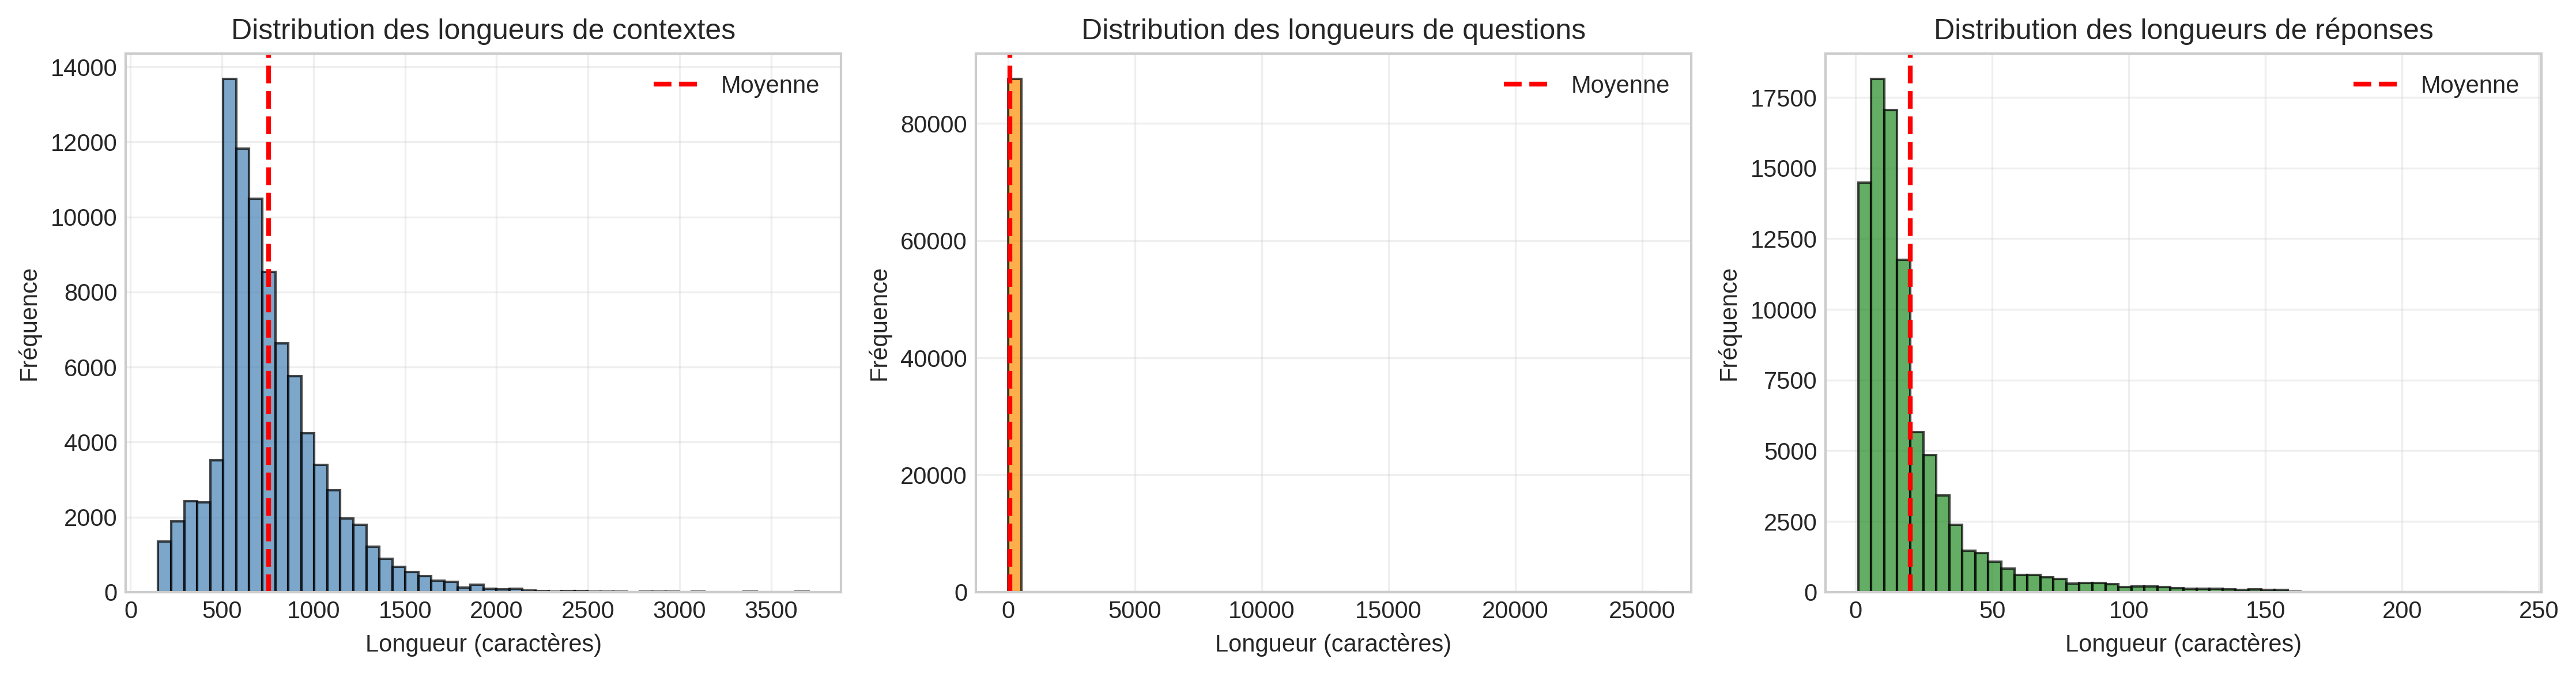

Figure 1 sauvegardée: figure_1_distributions_longueurs.png


In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution des contextes
axes[0].hist(train_df['context_length'], bins=50, edgecolor='black',
             alpha=0.7, color='steelblue')
axes[0].axvline(train_df['context_length'].mean(), color='red',
                linestyle='--', linewidth=2, label='Moyenne')
axes[0].set_xlabel('Longueur (caractères)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des longueurs de contextes')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribution des questions
axes[1].hist(train_df['question_length'], bins=50, edgecolor='black',
             alpha=0.7, color='darkorange')
axes[1].axvline(train_df['question_length'].mean(), color='red',
                linestyle='--', linewidth=2, label='Moyenne')
axes[1].set_xlabel('Longueur (caractères)')
axes[1].set_ylabel('Fréquence')
axes[1].set_title('Distribution des longueurs de questions')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Distribution des réponses
axes[2].hist(train_df['answer_length'], bins=50, edgecolor='black',
             alpha=0.7, color='forestgreen')
axes[2].axvline(train_df['answer_length'].mean(), color='red',
                linestyle='--', linewidth=2, label='Moyenne')
axes[2].set_xlabel('Longueur (caractères)')
axes[2].set_ylabel('Fréquence')
axes[2].set_title('Distribution des longueurs de réponses')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figure_1_distributions_longueurs.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 1 sauvegardée: figure_1_distributions_longueurs.png")

**Analyse de la longueur des contextes**

**Les contextes** présentent une longueur moyenne d’environ 754 caractères, avec une médiane de 693,
mais peuvent atteindre jusqu’à 3 706 caractères. Cette distribution montre que, bien que la majorité
des contextes soient de taille modérée, une proportion non négligeable de contextes longs est présente.

Cette observation justifie l’utilisation d’une stratégie de découpage du texte (chunking)
lors de la tokenisation, afin de gérer les contextes dépassant la longueur maximale acceptée
par les modèles Transformer.

**Analyse de la longueur des questions**

**Les questions** sont relativement courtes, avec une longueur moyenne d’environ 59 caractères
et une médiane de 56. Cela confirme que la tâche repose sur des questions factuelles simples,
souvent formulées de manière directe.

Cependant, la présence de valeurs extrêmes (questions très longues) indique l’existence
de cas atypiques dans le dataset, qui peuvent correspondre à des artefacts ou à des
formulations inhabituelles. Ces cas restent marginaux et n’impactent pas significativement
le comportement global du modèle.

**Analyse de la longueur des réponses**

**Les réponses** sont majoritairement courtes, avec une longueur médiane de 14 caractères
et une moyenne d’environ 20 caractères. Cela confirme que SQuAD est bien adapté
à une approche de Question Answering extractif, où la réponse correspond généralement
à un court segment du contexte.

Néanmoins, certaines réponses peuvent dépasser 50 caractères, ce qui justifie de ne pas fixer
une longueur maximale de réponse trop restrictive lors du post-traitement des prédictions.


## 7. Analyse des Thématiques

Nombre total de thématiques distinctes: 442

Top 10 des thématiques les plus représentées:
title
New_York_City                       817
American_Idol                       802
Beyoncé                             758
Frédéric_Chopin                     697
Queen_Victoria                      680
Buddhism                            610
New_Haven,_Connecticut              602
2008_Sichuan_earthquake             521
2008_Summer_Olympics_torch_relay    500
Muammar_Gaddafi                     489


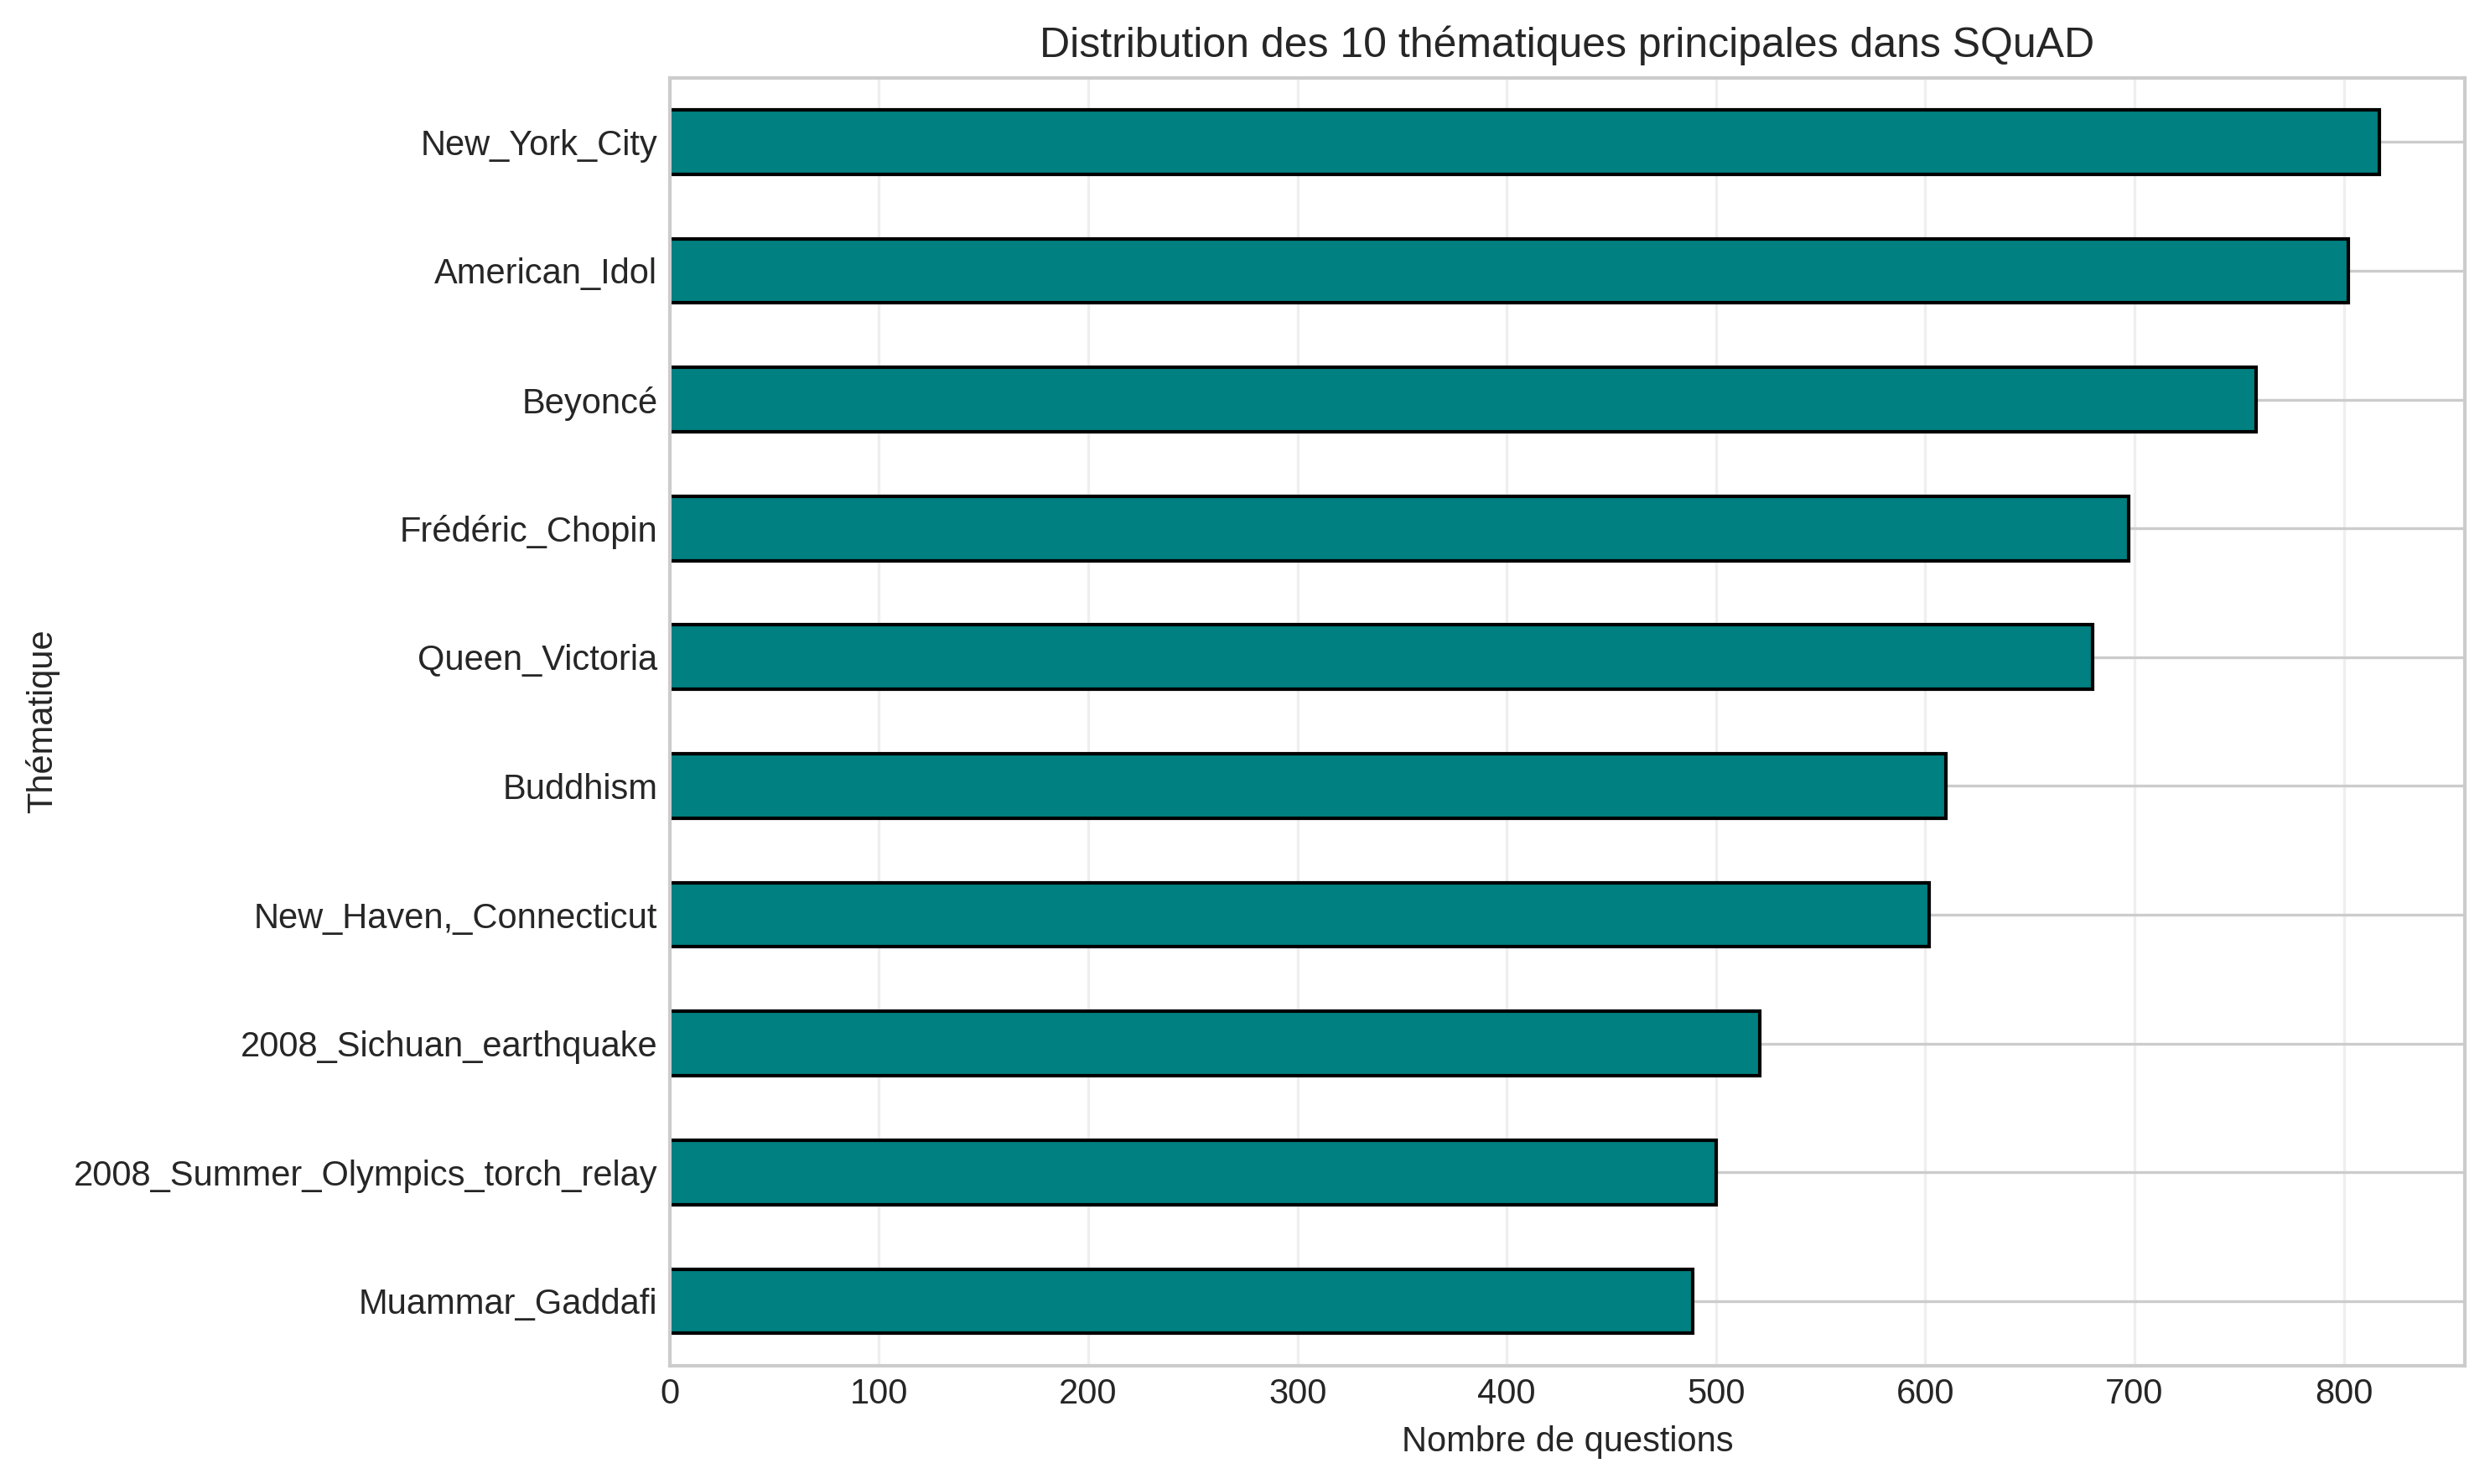

Figure 2 sauvegardée: figure_2_distribution_topics.png


In [8]:
topic_counts = train_df['title'].value_counts()

print(f"Nombre total de thématiques distinctes: {len(topic_counts)}")
print(f"\nTop 10 des thématiques les plus représentées:")
print(topic_counts.head(10).to_string())

fig, ax = plt.subplots(figsize=(10, 6))
topic_counts.head(10).plot(kind='barh', ax=ax, color='teal', edgecolor='black')
ax.set_xlabel('Nombre de questions')
ax.set_ylabel('Thématique')
ax.set_title('Distribution des 10 thématiques principales dans SQuAD')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('figure_2_distribution_topics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 2 sauvegardée: figure_2_distribution_topics.png")

Le dataset contient plus de 400 thématiques distinctes, certaines étant fortement représentées.
Cette concentration thématique peut introduire un biais de distribution, favorisant certains
types de contenus lors de l’entraînement.

Toutefois, la diversité globale des topics permet au modèle d’apprendre des représentations
générales et transférables, plutôt que de se spécialiser sur un domaine unique.

## 8. Analyse Linguistique des Questions

Distribution des mots interrogatifs
question
What      37321
How        8084
Who        8080
When       5420
In         4308
Which      4150
Where      3263
The        2298
Why        1193
On          589
Along       579
During      440
At          345
A           315
For         303


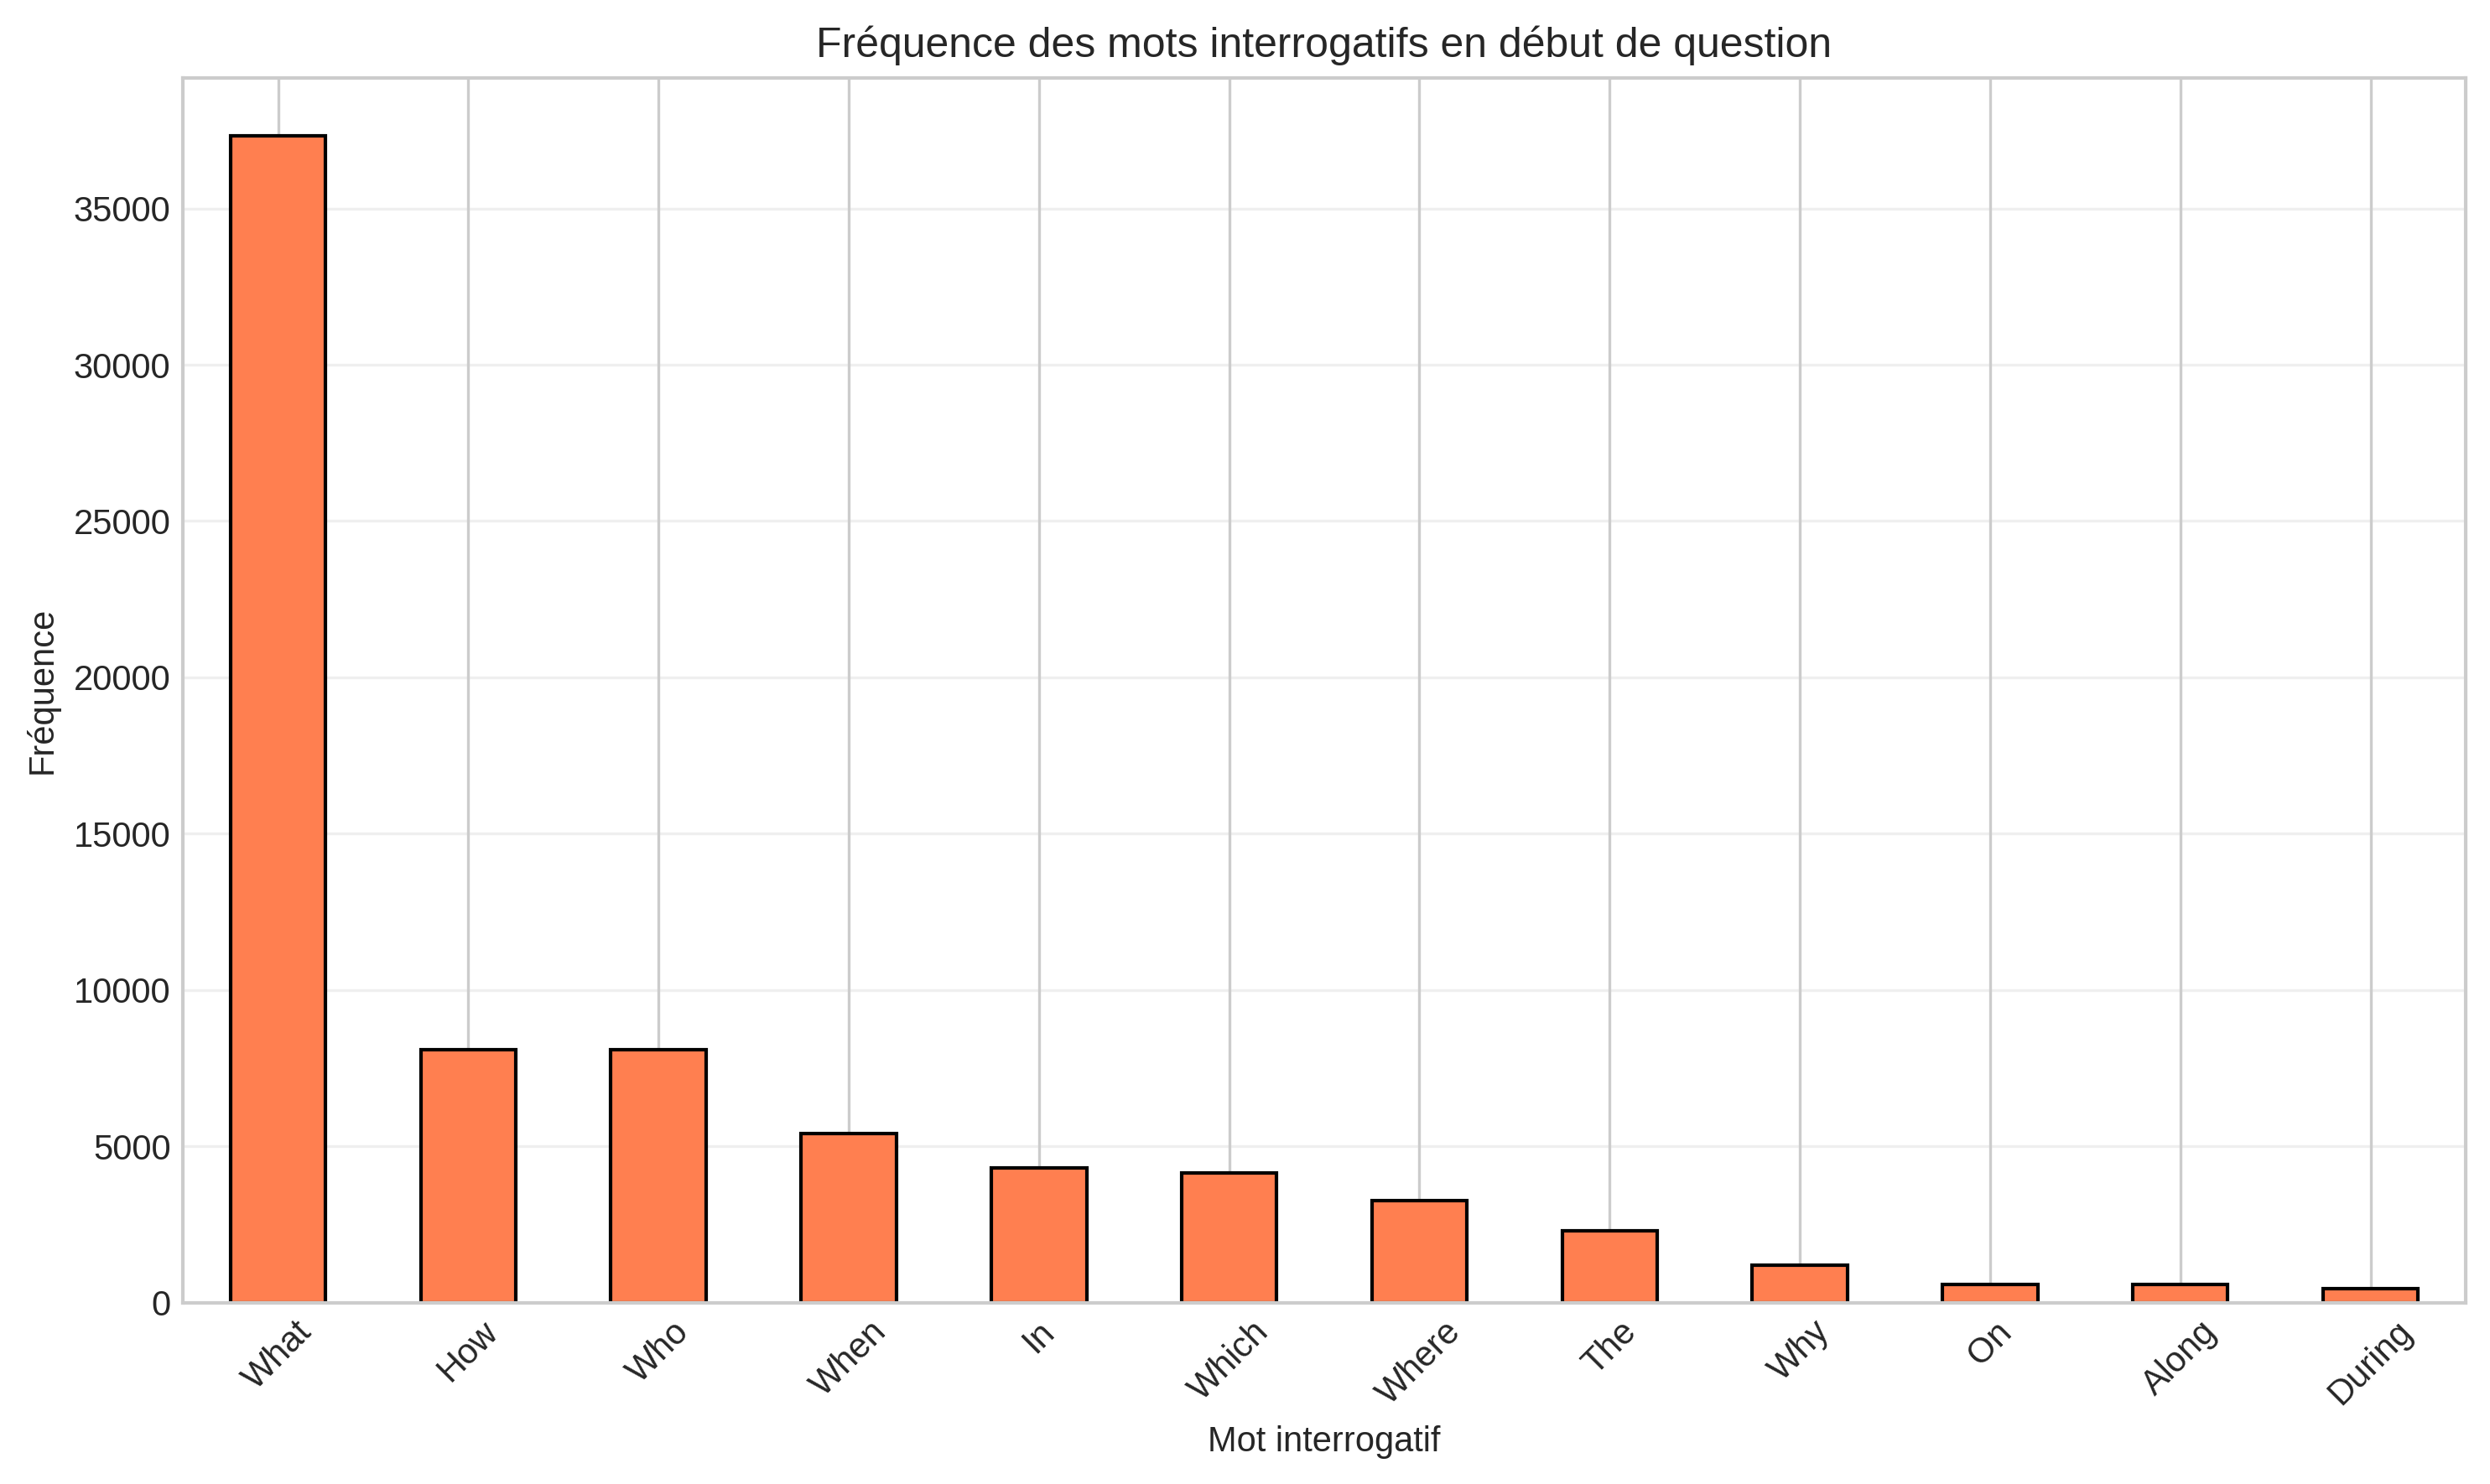

Figure 3 sauvegardée: figure_3_mots_interrogatifs.png


In [9]:
first_words = train_df['question'].str.split().str[0].value_counts()

print("="*80)
print("Distribution des mots interrogatifs")
print("="*80)
print(first_words.head(15).to_string())

fig, ax = plt.subplots(figsize=(10, 6))
first_words.head(12).plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel('Mot interrogatif')
ax.set_ylabel('Fréquence')
ax.set_title('Fréquence des mots interrogatifs en début de question')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figure_3_mots_interrogatifs.png', dpi=300, bbox_inches='tight')
plt.show()

print("Figure 3 sauvegardée: figure_3_mots_interrogatifs.png")


La majorité des questions commencent par des mots interrogatifs tels que "What", "Who",
"When" et "How". Cela indique que le dataset est principalement orienté vers des questions
factuelles nécessitant l’extraction d’informations précises à partir du contexte.

Ce type de formulation est particulièrement bien adapté aux modèles de type Transformer
entraînés pour le Question Answering extractif.

## 9. Position des Réponses dans le Contexte

Analyse de la position des réponses dans le contexte
Position relative moyenne: 0.431
Médiane: 0.398


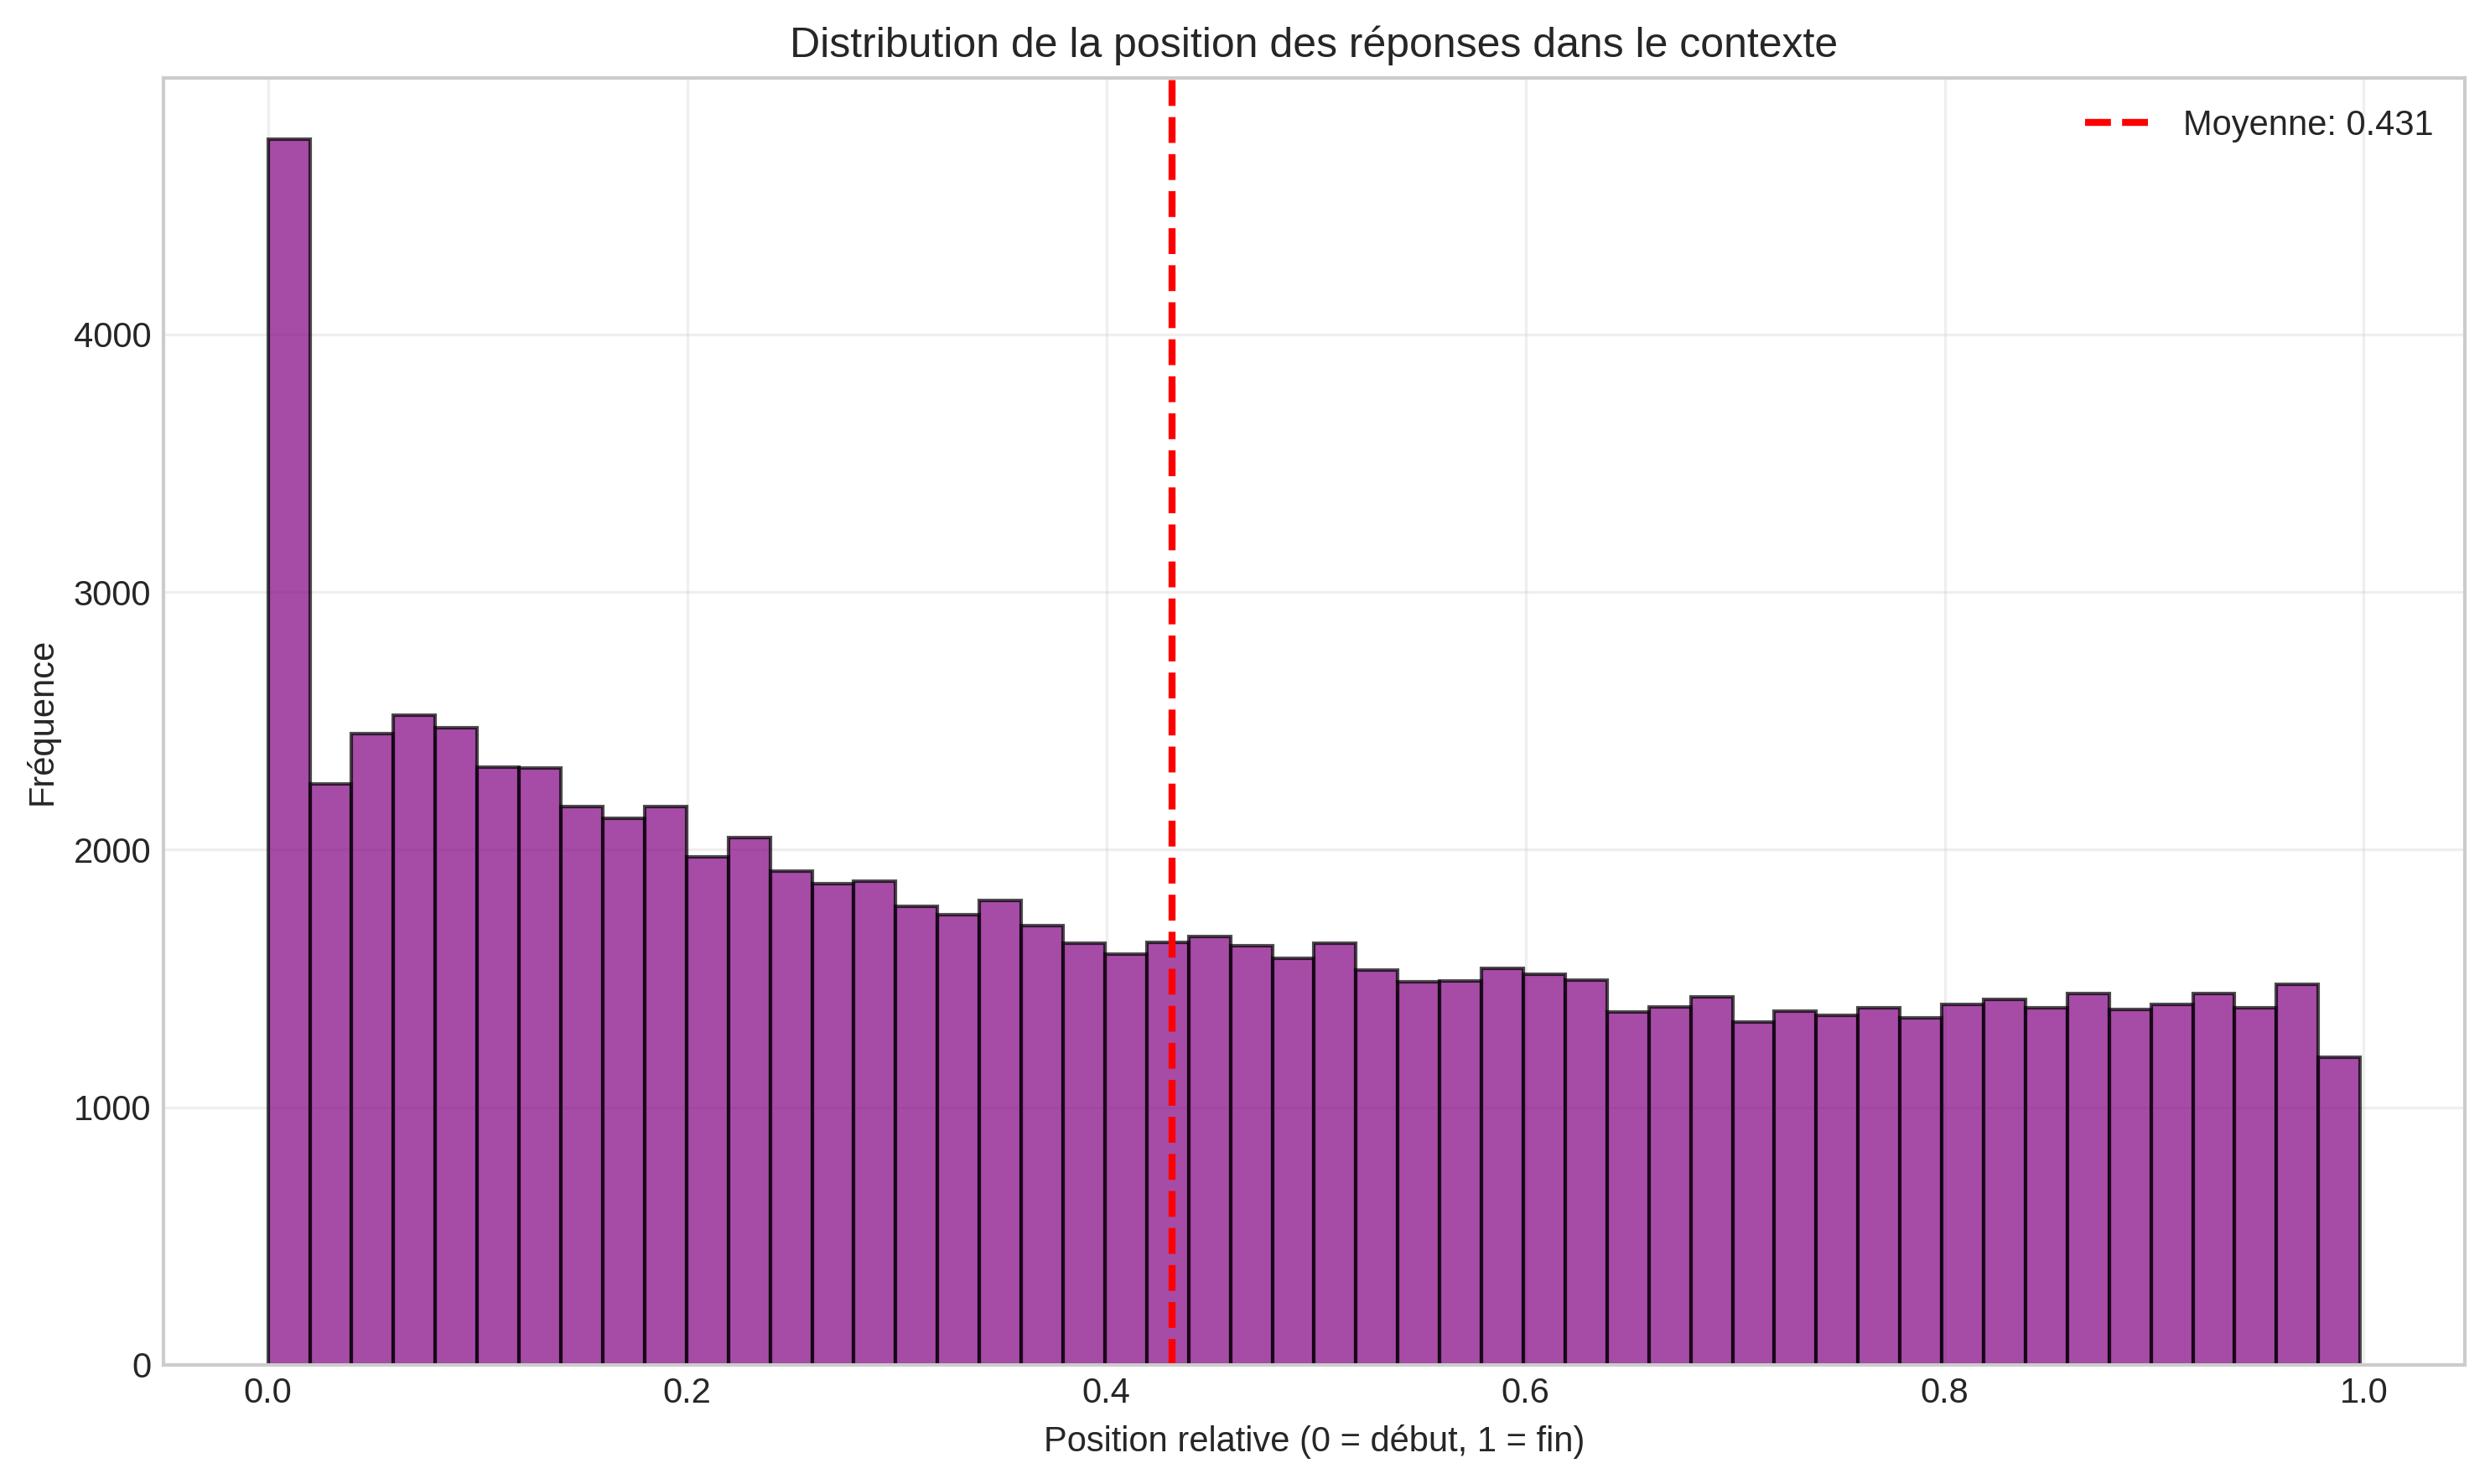

Figure 4 sauvegardée: figure_4_positions_reponses.png


In [10]:
train_df['answer_position_ratio'] = train_df.apply(
    lambda row: row['answers']['answer_start'][0] / len(row['context'])
    if len(row['context']) > 0 else 0,
    axis=1
)

print("="*80)
print("Analyse de la position des réponses dans le contexte")
print("="*80)
print(f"Position relative moyenne: {train_df['answer_position_ratio'].mean():.3f}")
print(f"Médiane: {train_df['answer_position_ratio'].median():.3f}")

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(train_df['answer_position_ratio'], bins=50, edgecolor='black',
        alpha=0.7, color='purple')
ax.axvline(train_df['answer_position_ratio'].mean(), color='red',
           linestyle='--', linewidth=2,
           label=f"Moyenne: {train_df['answer_position_ratio'].mean():.3f}")
ax.set_xlabel('Position relative (0 = début, 1 = fin)')
ax.set_ylabel('Fréquence')
ax.set_title('Distribution de la position des réponses dans le contexte')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figure_4_positions_reponses.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure 4 sauvegardée: figure_4_positions_reponses.png")

La position moyenne des réponses se situe autour de 43 % de la longueur du contexte,
avec une dispersion relativement large. Environ 16 % des réponses apparaissent
dans les derniers 20 % du contexte.

Cette observation souligne l’importance d’un chevauchement (doc_stride) lors du découpage
des contextes, afin de limiter le risque de perdre la réponse lors de la tokenisation
des contextes longs.

## 10. Identification des Cas Limites

In [11]:
print("="*80)
print("Identification des cas limites")
print("="*80)

long_contexts = train_df[train_df['context_length'] > 1000]
print(f"\nContextes > 1000 caractères: {len(long_contexts)} "
      f"({len(long_contexts)/len(train_df)*100:.2f}%)")

long_answers = train_df[train_df['answer_length'] > 50]
print(f"Réponses > 50 caractères: {len(long_answers)} "
      f"({len(long_answers)/len(train_df)*100:.2f}%)")

late_answers = train_df[train_df['answer_position_ratio'] > 0.8]
print(f"Réponses dans les derniers 20% du contexte: {len(late_answers)} "
      f"({len(late_answers)/len(train_df)*100:.2f}%)")

Identification des cas limites

Contextes > 1000 caractères: 15123 (17.26%)
Réponses > 50 caractères: 6540 (7.47%)
Réponses dans les derniers 20% du contexte: 13797 (15.75%)


Une proportion significative de contextes dépasse 1 000 caractères, et certaines réponses
sont relativement longues ou positionnées en fin de contexte. Ces exemples constituent
des cas plus difficiles pour le modèle, car ils augmentent le risque de troncature
ou de mauvaise localisation de la réponse.

Ces contraintes doivent être prises en compte lors du choix des hyperparamètres,
notamment la longueur maximale des séquences et le chevauchement entre segments.

## 11. Implication pour le Fine-tuning

In [12]:
print("="*80)
print("Recommandations pour le fine-tuning")
print("="*80)

percentile_95_context = np.percentile(train_df['context_length'], 95)

print(f"""
Basé sur l'analyse statistique du dataset:

1. Longueur maximale des séquences (max_length):
   - 95e percentile des contextes: {percentile_95_context:.0f} caractères
   - Recommandation: 384 tokens (couvre environ 95% des contextes)

2. Stride pour les contextes longs (doc_stride):
   - Recommandation: 128 tokens
   - Permet un overlap de 50% pour les contextes fragmentés

3. Observations clés:
   - {len(long_contexts)/len(train_df)*100:.1f}% des contextes dépassent 1000 caractères
   - Les réponses sont généralement courtes (médiane: {train_df['answer_length'].median():.0f} caractères)
   - Position moyenne de la réponse: {train_df['answer_position_ratio'].mean():.1%} du contexte

4. Hyperparamètres suggérés:
   - Learning rate: 2e-5 à 5e-5
   - Batch size: 8-16 (selon GPU)
   - Epochs: 2-4
   - Warmup ratio: 0.1
""")

Recommandations pour le fine-tuning

Basé sur l'analyse statistique du dataset:

1. Longueur maximale des séquences (max_length):
   - 95e percentile des contextes: 1328 caractères
   - Recommandation: 384 tokens (couvre environ 95% des contextes)

2. Stride pour les contextes longs (doc_stride):
   - Recommandation: 128 tokens
   - Permet un overlap de 50% pour les contextes fragmentés

3. Observations clés:
   - 17.3% des contextes dépassent 1000 caractères
   - Les réponses sont généralement courtes (médiane: 14 caractères)
   - Position moyenne de la réponse: 43.1% du contexte

4. Hyperparamètres suggérés:
   - Learning rate: 2e-5 à 5e-5
   - Batch size: 8-16 (selon GPU)
   - Epochs: 2-4
   - Warmup ratio: 0.1



## 12. Export des Statistiques

In [13]:
summary_export = pd.DataFrame({
    'Métrique': [
        'Exemples training',
        'Exemples validation',
        'Thématiques uniques',
        'Longueur moyenne contexte',
        'Longueur moyenne question',
        'Longueur moyenne réponse',
    ],
    'Valeur': [
        len(train_df),
        len(val_df),
        train_df['title'].nunique(),
        round(train_df['context_length'].mean(), 1),
        round(train_df['question_length'].mean(), 1),
        round(train_df['answer_length'].mean(), 1),
    ]
})

summary_export.to_csv('tableau_1_statistiques_squad.csv', index=False)
print("Tableau 1 exporté: tableau_1_statistiques_squad.csv")

Tableau 1 exporté: tableau_1_statistiques_squad.csv


## Conclusion

Cette exploration a permis d'identifier les caractéristiques principales du dataset SQuAD v1.1 et de formuler des recommandations pour le fine-tuning des modèles Transformer.

**Fichiers générés:**
- figure_1_distributions_longueurs.png
- figure_2_distribution_topics.png
- figure_3_mots_interrogatifs.png
- figure_4_positions_reponses.png
- tableau_1_statistiques_squad.csv

**Prochaines étapes:**
1. Fine-tuning DistilBERT
2. Fine-tuning BERT
3. Fine-tuning RoBERTa
4. Analyse comparative

In [14]:
# Téléchargement des fichiers [pour google colab]
try:
    from google.colab import files
    files.download('figure_1_distributions_longueurs.png')
    files.download('figure_2_distribution_topics.png')
    files.download('figure_3_mots_interrogatifs.png')
    files.download('figure_4_positions_reponses.png')
    files.download('tableau_1_statistiques_squad.csv')
except ImportError:
    print("Exécution en environnement local.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>